In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

In [5]:
df=pd.read_csv("Mall_Customers (3).csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.drop(columns=["CustomerID", "Gender"],inplace=True)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaled_data=scaler.fit_transform(df)
df=pd.DataFrame(scaled_data,columns=df.columns)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


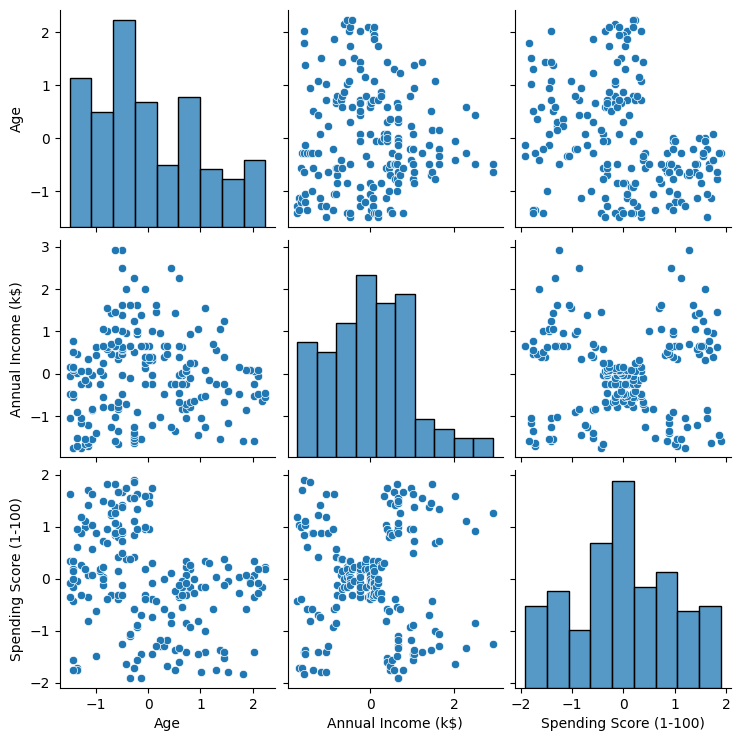

In [9]:
sns.pairplot(df)
plt.show()

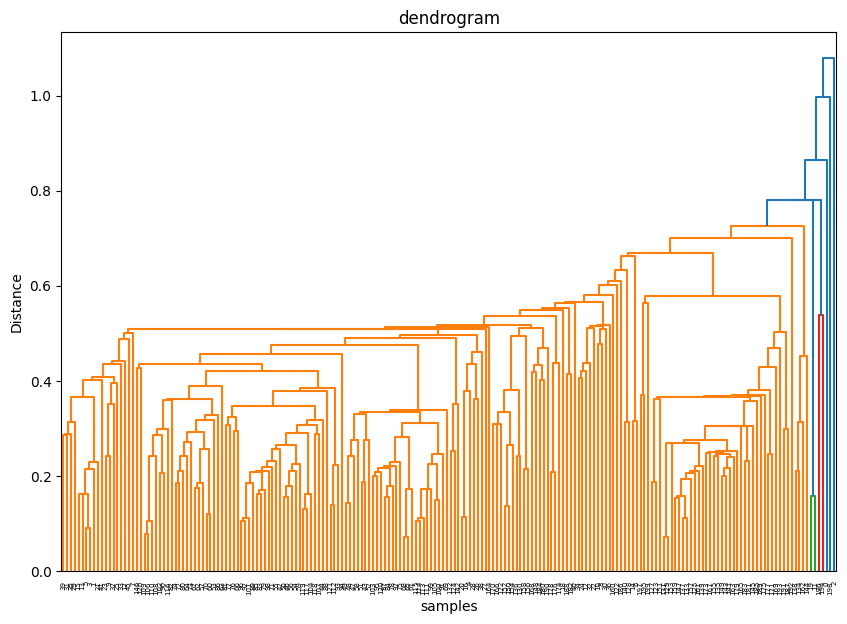

In [11]:
from sklearn.cluster import AgglomerativeClustering
linked=linkage(df,method='single')

plt.figure(figsize=(10,7))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.title('dendrogram')
plt.xlabel('samples')
plt.ylabel('Distance')
plt.show()

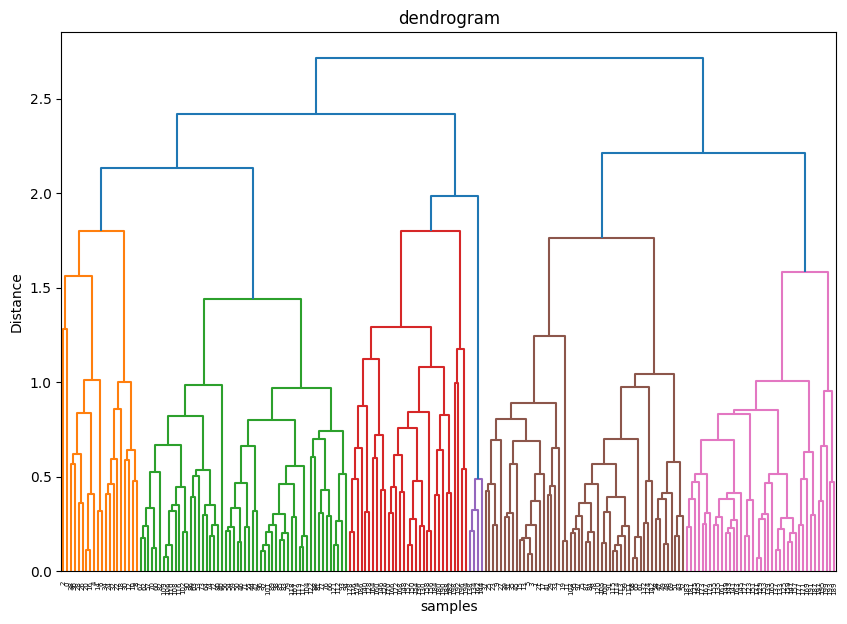

In [12]:
from sklearn.cluster import AgglomerativeClustering
linked=linkage(df,method='average')

plt.figure(figsize=(10,7))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.title('dendrogram')
plt.xlabel('samples')
plt.ylabel('Distance')
plt.show()

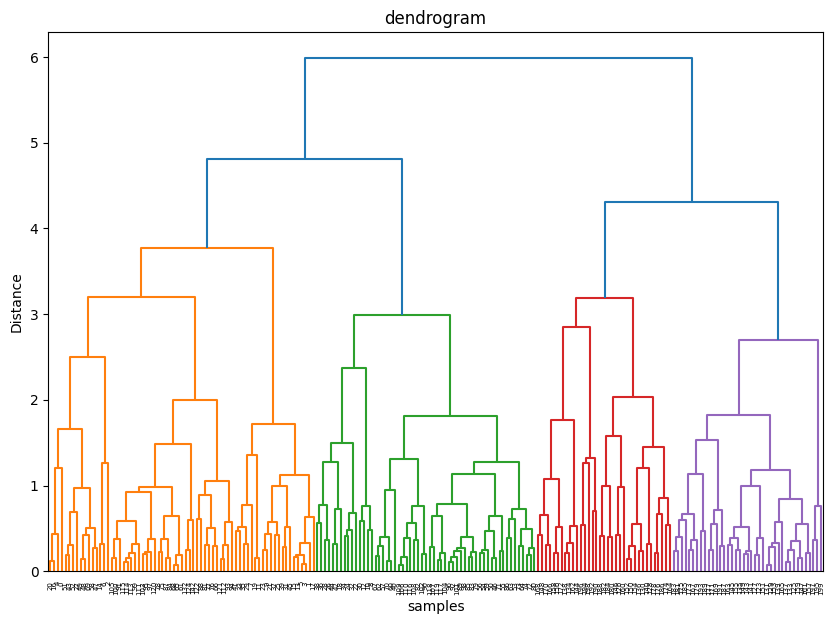

In [13]:
from sklearn.cluster import AgglomerativeClustering
linked=linkage(df,method='complete')

plt.figure(figsize=(10,7))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.title('dendrogram')
plt.xlabel('samples')
plt.ylabel('Distance')
plt.show()

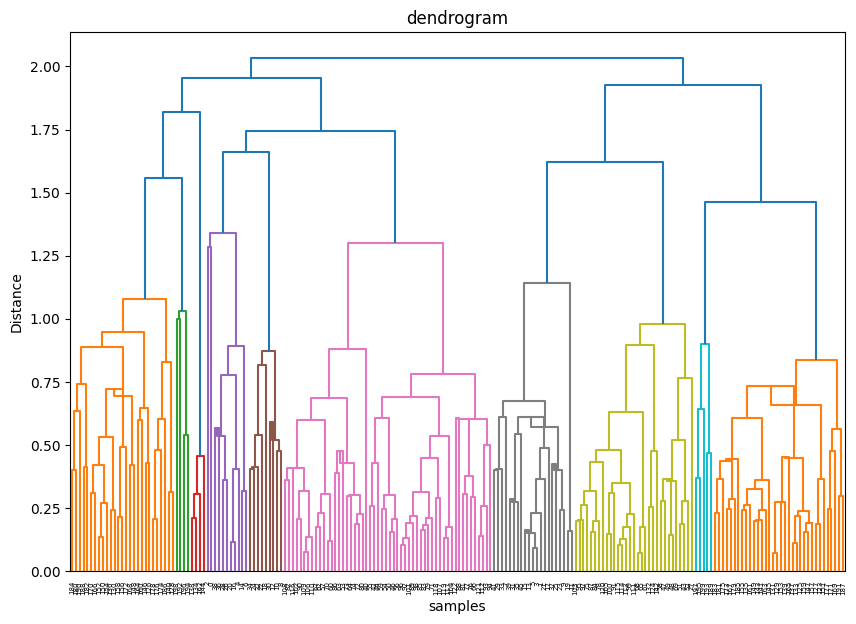

In [14]:
from sklearn.cluster import AgglomerativeClustering
linked=linkage(df,method='centroid')

plt.figure(figsize=(10,7))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.title('dendrogram')
plt.xlabel('samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Training the model 
model=AgglomerativeClustering(n_clusters=5)
model.fit(df)
labels=model.labels_
labels

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0,
       4, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

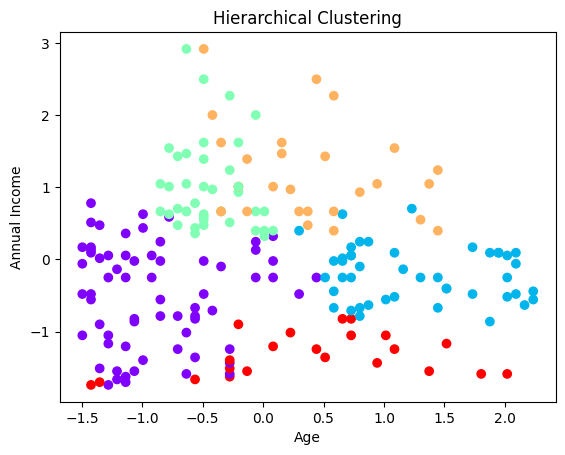

In [17]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels, cmap='rainbow')
plt.title("Hierarchical Clustering")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()


## Plot Dendogram with Thershold

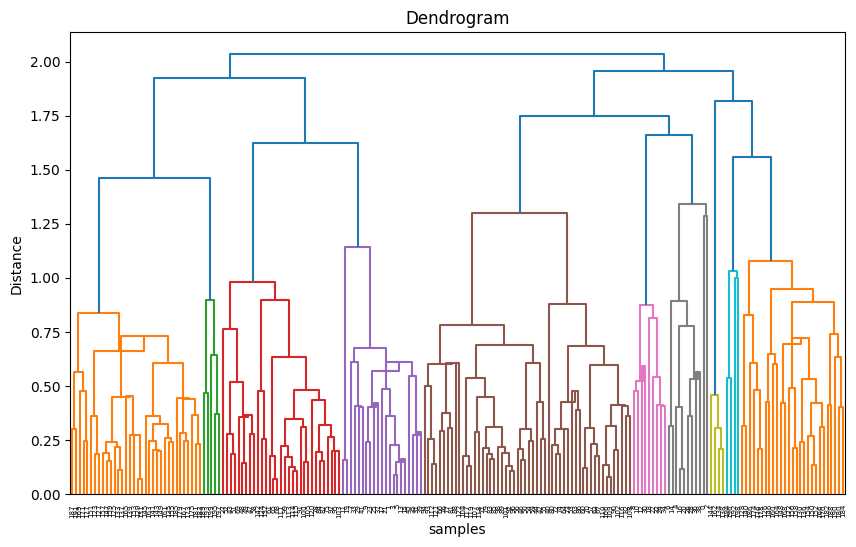

In [18]:
plt.figure(figsize=(10,6))
dendrogram(linked)
plt.axhline(y=150,color='r',linestyle='--')
plt.title('Dendrogram')
plt.xlabel('samples')
plt.ylabel('Distance')
plt.show()


In [19]:
# find the number of clusters using Threshold 
from scipy.cluster.hierarchy import fcluster

clusters=fcluster(linked,t=150,criterion='distance')
n_clusters=len(set(clusters))
print(f'No of clusters {n_clusters}')


No of clusters 1


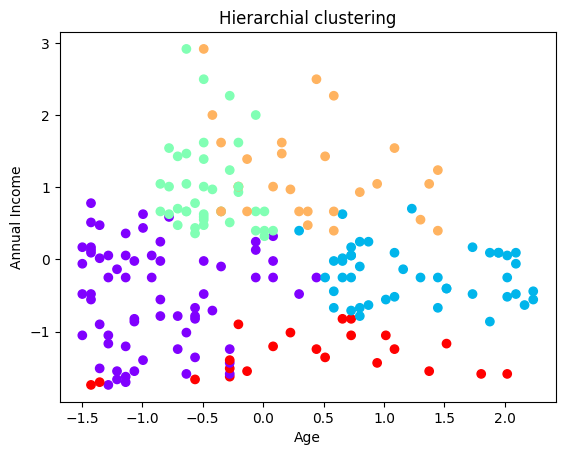

In [21]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=labels,cmap='rainbow')
plt.title("Hierarchial clustering")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()

In [41]:
# Create DataFrame with CORRECT column names
data = pd.DataFrame(
    df,
    columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
)

In [42]:
data = data.dropna()



In [43]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [44]:
model = AgglomerativeClustering(n_clusters=5)
model.fit(scaled_data)

,n_clusters,5
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [46]:
labels = model.labels_

# Add labels
data['labels'] = labels
data.head()

,Age,Annual Income (k$),Spending Score (1-100),labels
0,-1.424569,-1.738999,-0.434801,4
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,4
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,4


In [47]:
data.to_csv('Mall_customer_clustered.csv', index=False)
print(data.head())

        Age  Annual Income (k$)  Spending Score (1-100)  labels
0 -1.424569           -1.738999               -0.434801       4
1 -1.281035           -1.738999                1.195704       0
2 -1.352802           -1.700830               -1.715913       4
3 -1.137502           -1.700830                1.040418       0
4 -0.563369           -1.662660               -0.395980       4


In [48]:
import joblib
joblib.dump(model,'hierarchical_model.pkl')

['hierarchical_model.pkl']